# House Prices: Advanced Regression Techniques
## A mediumai approach.

Create symlink to fastai directory using `mklink /d fastai ..\..\fastai` in (administrator) command prompt (Windows 10). Subsequently, import required modules.

In [51]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

Read in training data using pandas.

In [52]:
PATH = "input/"

In [53]:
df_raw = pd.read_csv(f'{PATH}train.csv', low_memory=False)

Function from fastai lesson 1 which allows up to 1000 columns to be displayed. 

In [54]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [55]:
display_all(df_raw.tail().T)

,1455,1456,1457,1458,1459
Id,1456,1457,1458,1459,1460
MSSubClass,60,20,70,20,20
MSZoning,RL,RL,RL,RL,RL
LotFrontage,62,85,66,68,75
LotArea,7917,13175,9042,9717,9937
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,Reg,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


Need to minimise the root mean squared logarithmic error. 

In [56]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

## Random Forest
Lets just try a random forest.

The categorical variables are currently stored as strings which doesn't provide the numeric coding required for a random forest. Therefore we call `train_cats` to convert strings to pandas categories.

In [57]:
train_cats(df_raw)

In [58]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

1stFlrSF         0.000000
2ndFlrSF         0.000000
3SsnPorch        0.000000
Alley            0.937671
BedroomAbvGr     0.000000
BldgType         0.000000
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinSF1       0.000000
BsmtFinSF2       0.000000
BsmtFinType1     0.025342
BsmtFinType2     0.026027
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
BsmtQual         0.025342
BsmtUnfSF        0.000000
CentralAir       0.000000
Condition1       0.000000
Condition2       0.000000
Electrical       0.000685
EnclosedPorch    0.000000
ExterCond        0.000000
ExterQual        0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
Fence            0.807534
FireplaceQu      0.472603
Fireplaces       0.000000
Foundation       0.000000
FullBath         0.000000
Functional       0.000000
GarageArea       0.000000
GarageCars       0.000000
GarageCond       0.055479
GarageFinish     0.055479
GarageQual       0.055479
GarageType       0.055479
GarageYrBlt      0.055479
GrLivArea   

In [59]:
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/house_prices-raw')

Lets save 1/2 the data for validation (`n_valid = 730`).

In [60]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()
n_valid = 730
n_trn = len(df_raw)-n_valid # 730 for this competition.

In [61]:
#df_raw = pd.read_feather('tmp/house_prices-raw',1) Not working - some kind of pandas issue. 
import feather
df_raw = feather.read_dataframe('tmp/house_prices-raw')

Process raw categorical data and missing values. Potentially Exclude `Alley` and `MiscFeature`, due to the high proportion of `NaN` values. 

In [62]:
df, y, nas = proc_df(df_raw, 'SalePrice',['Alley','MiscFeature'])

#df, y, nas = proc_df(df_raw, 'SalePrice')
#?proc_df

Split training and validation data.

In [63]:
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((730, 81), (730,), (730, 81))

In [64]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    print('##################################################')
    print('Results')
    print('log Root Mean Square Error Training Set: {:0.3}'.format(rmse(m.predict(X_train), y_train)))
    print('log Root Mean Square Error Validation Set: {:0.3}'.format(rmse(m.predict(X_valid), y_valid)))
    print('R^2 Training Set: {:0.3}'.format(m.score(X_train, y_train)))
    print('R^2 Validation Set: {:0.3}'.format(m.score(X_valid, y_valid)))
    if hasattr(m, 'oob_score_'): print('oob_score: {:0.3}'.format(m.oob_score_))
    print('##################################################')
    #if hasattr(m, 'oob_score_'): res.append(m.oob_score_)

In [65]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

C:\Users\Tristan\Anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Wall time: 109 ms
##################################################
Results
log Root Mean Square Error Training Set: 0.0728
log Root Mean Square Error Validation Set: 0.159
R^2 Training Set: 0.969
R^2 Validation Set: 0.827
##################################################


A naive score of around 0.15. This puts us at araund rank 2770 out of 4305, around the top 64th percentile (i.e. only better than 36% of participants - mediumai indeed). 

## Single Tree

In [66]:
m = RandomForestRegressor(n_estimators = 1, max_depth = 3, bootstrap = False, n_jobs=-1)
m.fit(X_train,y_train)
print_score(m)

##################################################
Results
log Root Mean Square Error Training Set: 0.215
log Root Mean Square Error Validation Set: 0.224
R^2 Training Set: 0.734
R^2 Validation Set: 0.655
##################################################


Install 'graphviz' from https://graphviz.gitlab.io/_pages/Download/Download_windows.html. Add `C:\Program Files (x86)\Graphviz2.38\bin` to User Path and `C:\Program Files (x86)\Graphviz2.38\bin\dot.exe` to System Path (windows 10).

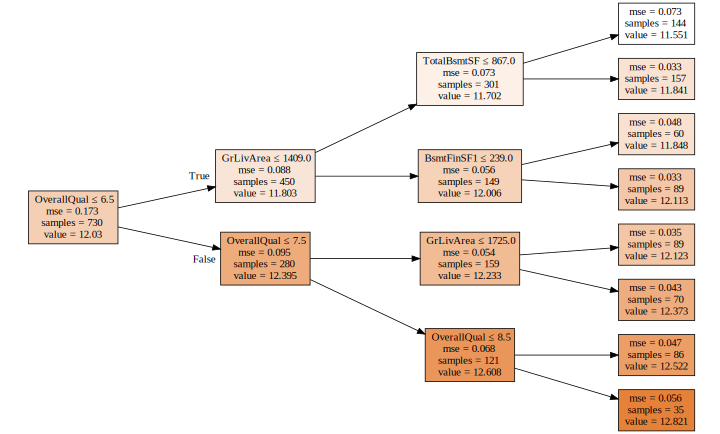

In [67]:
draw_tree(m.estimators_[0],X_train, precision=3)
?draw_tree

`OverallQual`Rates the overall material and finish of the house.  
`GrLivArea`   
`TotalBsmtSF`   
`BsmtFinSF1` 

   `OverallQual`:  
   10   Very Excellent  
   9    Excellent  
   8    Very Good  
   7    Good  
   6    Above Average  
   5    Average  
   4    Below Average  
   3    Fair  
   2    Poor  
   1    Very Poor  

In [68]:
np.exp(12.821)-np.exp(11.522)

268992.8636859546

In [69]:
np.exp(12.821)

369904.44703091163

In [70]:
m = RandomForestRegressor(n_estimators = 40, n_jobs=-1, oob_score=True)
%time  m.fit(X_train, y_train)
print_score(m)

Wall time: 120 ms
##################################################
Results
log Root Mean Square Error Training Set: 0.06
log Root Mean Square Error Validation Set: 0.149
R^2 Training Set: 0.979
R^2 Validation Set: 0.847
oob_score: 0.845
##################################################


We'll grab the predictions for each individual tree, and look at one example.

In [71]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0] # Corresponding to first item in validation set.

(array([12.52453, 12.67608, 12.79918, 12.56375, 12.56375, 12.53358, 12.56375, 12.49125, 12.36734, 12.6346 ,
        12.52453, 12.56375, 12.55673, 12.52088, 12.52453, 12.48583, 12.56375, 12.42922, 12.25248, 12.30138,
        12.25486, 12.36308, 12.67576, 12.52088, 12.56375, 12.84113, 12.25486, 12.6346 , 12.52441, 12.52453,
        12.47801, 12.44509, 12.45098, 12.51356, 12.56375, 12.25248, 12.53358, 12.861  , 12.52453, 12.44509]),
 12.516669115310986,
 12.373703486914124)

In [72]:
preds.shape

(40, 730)

Text(0.5, 0, 'n_estimators')

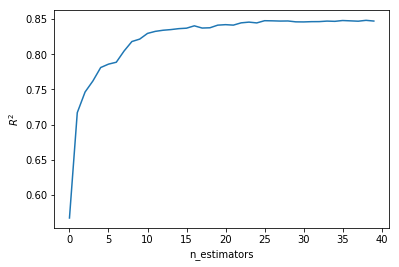

In [73]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(40)]);
plt.ylabel('$R^2$')
plt.xlabel('n_estimators')

Text(0.5, 0, 'n_estimators')

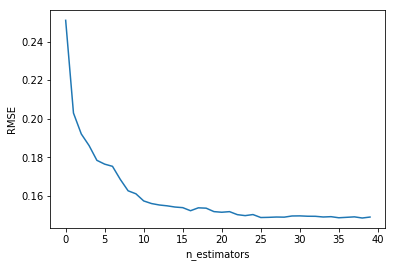

In [74]:
plt.plot([rmse(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(40)]);
plt.ylabel('RMSE')
plt.xlabel('n_estimators')

In [75]:
m = RandomForestRegressor(n_estimators = 40, max_features = 0.5, n_jobs=-1, oob_score=True)
%time  m.fit(X_train, y_train)
print_score(m)

Wall time: 121 ms
##################################################
Results
log Root Mean Square Error Training Set: 0.0598
log Root Mean Square Error Validation Set: 0.143
R^2 Training Set: 0.979
R^2 Validation Set: 0.859
oob_score: 0.85
##################################################


Improvement using `max_features = 0.5`.

In [76]:
#?RandomForestRegressor

In [77]:
max_features_vals = [0.001, 0.01, 0.1, 0.5, 1, 10, 15, 50, 70]
max_features_score = []
for i in max_features_vals:
    m = RandomForestRegressor(n_estimators = 40, max_features = i, n_jobs=-1, oob_score=True)
    m.fit(X_train, y_train)
    max_features_score.append(m.score(X_valid, y_valid))


Text(0.5, 0, 'max_features')

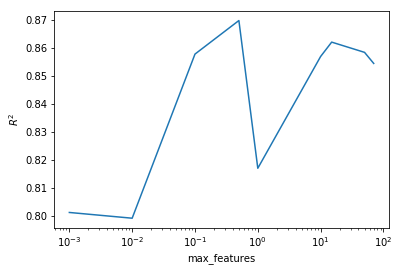

In [78]:
plt.semilogx(max_features_vals,max_features_score)
plt.ylabel('$R^2$')
plt.xlabel('max_features')

In [79]:
max_features_vals =np.linspace(0.1,1,100)
print(max_features_vals)

[0.1     0.10909 0.11818 0.12727 0.13636 0.14545 0.15455 0.16364 0.17273 0.18182 0.19091 0.2     0.20909
 0.21818 0.22727 0.23636 0.24545 0.25455 0.26364 0.27273 0.28182 0.29091 0.3     0.30909 0.31818 0.32727
 0.33636 0.34545 0.35455 0.36364 0.37273 0.38182 0.39091 0.4     0.40909 0.41818 0.42727 0.43636 0.44545
 0.45455 0.46364 0.47273 0.48182 0.49091 0.5     0.50909 0.51818 0.52727 0.53636 0.54545 0.55455 0.56364
 0.57273 0.58182 0.59091 0.6     0.60909 0.61818 0.62727 0.63636 0.64545 0.65455 0.66364 0.67273 0.68182
 0.69091 0.7     0.70909 0.71818 0.72727 0.73636 0.74545 0.75455 0.76364 0.77273 0.78182 0.79091 0.8
 0.80909 0.81818 0.82727 0.83636 0.84545 0.85455 0.86364 0.87273 0.88182 0.89091 0.9     0.90909 0.91818
 0.92727 0.93636 0.94545 0.95455 0.96364 0.97273 0.98182 0.99091 1.     ]


In [80]:
max_features_score = []
for i in max_features_vals:
    m = RandomForestRegressor(n_estimators = 40, max_features = i, n_jobs=-1, oob_score=True)
    m.fit(X_train, y_train)
    max_features_score.append(m.score(X_valid, y_valid))

Text(0.5, 0, 'max_features')

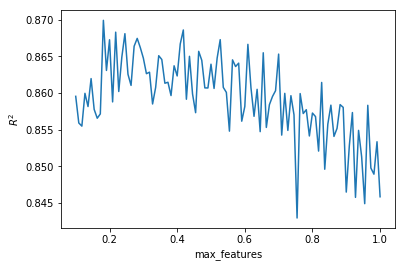

In [81]:
plt.plot(max_features_vals,max_features_score)
plt.ylabel('$R^2$')
plt.xlabel('max_features')

In [82]:
#?RandomForestRegressor

In [83]:
m = RandomForestRegressor(n_estimators = 40, max_features = 0.45, n_jobs=-1, oob_score=True)
%time  m.fit(X_train, y_train)
print_score(m)

Wall time: 120 ms
##################################################
Results
log Root Mean Square Error Training Set: 0.0601
log Root Mean Square Error Validation Set: 0.141
R^2 Training Set: 0.979
R^2 Validation Set: 0.863
oob_score: 0.85
##################################################


In [84]:
fi = rf_feat_importance(m, df); fi [:10]

,cols,imp
16,OverallQual,0.276576
45,GrLivArea,0.164373
60,GarageCars,0.062358
18,YearBuilt,0.054843
61,GarageArea,0.049851
37,TotalBsmtSF,0.043125
26,ExterQual,0.033735
48,FullBath,0.032435
42,1stFlrSF,0.029808
33,BsmtFinSF1,0.022075


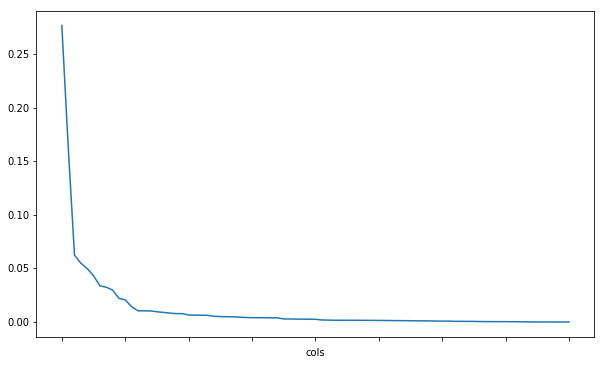

In [85]:
fi.plot('cols','imp', figsize=(10,6), legend = False)

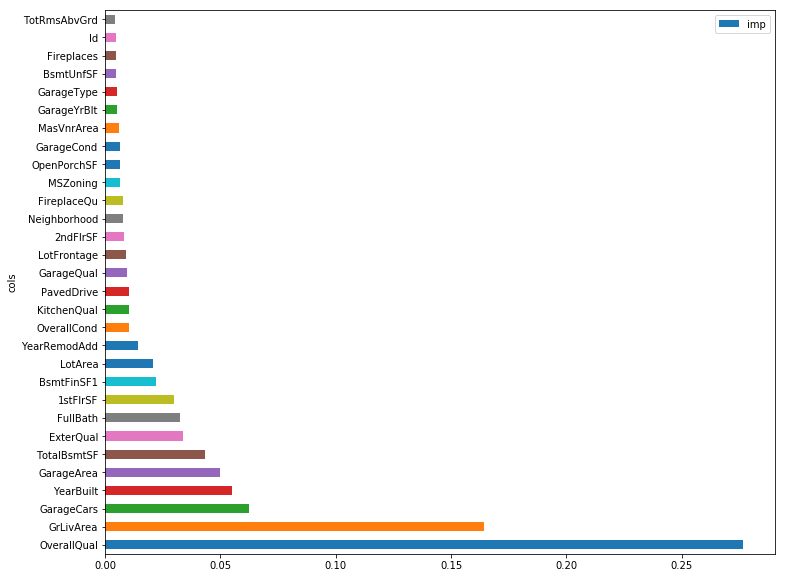

In [86]:
fi[:30].plot('cols', 'imp', 'barh', figsize = (12,10))

In [87]:
to_keep = fi[fi.imp>0.005].cols; len(to_keep)

26

In [88]:
df_keep = df[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

In [89]:
m = RandomForestRegressor(n_estimators = 40, max_features = 0.45, n_jobs=-1, oob_score=True)
%time  m.fit(X_train, y_train)
print_score(m)

Wall time: 119 ms
##################################################
Results
log Root Mean Square Error Training Set: 0.0587
log Root Mean Square Error Validation Set: 0.138
R^2 Training Set: 0.98
R^2 Validation Set: 0.87
oob_score: 0.854
##################################################


In [90]:
fi = rf_feat_importance(m, df_keep); fi [:10]

,cols,imp
0,OverallQual,0.302850
1,GrLivArea,0.124713
3,YearBuilt,0.066091
2,GarageCars,0.065284
6,ExterQual,0.053132
5,TotalBsmtSF,0.049994
8,1stFlrSF,0.042637
7,FullBath,0.039617
4,GarageArea,0.037411
9,BsmtFinSF1,0.027744


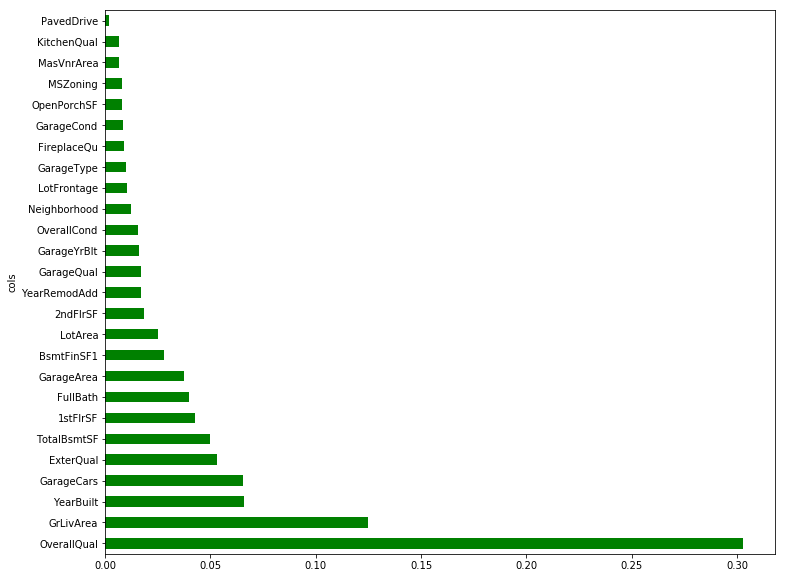

In [91]:
fi[:30].plot('cols', 'imp', 'barh', figsize = (12,10), legend = False, color='g')

`GrLivArea`: Above grade (ground) living area square feet  
`YearBuilt`: Original construction date  

In [92]:
df_sample_sub = pd.read_csv(f'{PATH}sample_submission.csv', low_memory=False)

In [93]:
df_sample_sub.SalePrice

0       169277.052498
1       187758.393989
2       183583.683570
3       179317.477511
4       150730.079977
5       177150.989247
6       172070.659229
7       175110.956520
8       162011.698832
9       160726.247831
10      157933.279456
11      145291.245020
12      159672.017632
13      164167.518302
14      150891.638244
15      179460.965187
16      185034.628914
17      182352.192645
18      183053.458214
19      187823.339254
20      186544.114328
21      158230.775205
22      190552.829321
23      147183.674872
24      185855.300905
25      174350.470677
26      201740.620691
27      162986.378896
28      162330.199086
29      165845.938617
            ...      
1429    160515.850579
1430    192167.621096
1431    178751.551083
1432    198678.894117
1433    164553.120272
1434    156887.932862
1435    164185.777306
1436    212992.120631
1437    197468.550533
1438    180106.843740
1439    183972.071057
1440    245283.198338
1441    170351.963411
1442    195596.307707
1443    18

In [94]:
df.Neighborhood

0        6
1       25
2        6
3        7
4       16
5       12
6       22
7       15
8       18
9        4
10      20
11      17
12      20
13       6
14      13
15       4
16      13
17      20
18      21
19      13
20      17
21      10
22       6
23      11
24      20
25      17
26      13
27      17
28      13
29       4
        ..
1430     9
1431    14
1432    18
1433     9
1434    12
1435    13
1436    13
1437    17
1438    18
1439    15
1440     7
1441     6
1442    22
1443     4
1444     6
1445    20
1446    12
1447     6
1448     8
1449    11
1450    13
1451    22
1452     8
1453    12
1454    22
1455     9
1456    15
1457     7
1458    13
1459     8
Name: Neighborhood, Length: 1460, dtype: int8

In [95]:
df_raw.Alley

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13       NaN
14       NaN
15       NaN
16       NaN
17       NaN
18       NaN
19       NaN
20       NaN
21      Grvl
22       NaN
23       NaN
24       NaN
25       NaN
26       NaN
27       NaN
28       NaN
29       NaN
        ... 
1430     NaN
1431     NaN
1432    Grvl
1433     NaN
1434     NaN
1435     NaN
1436     NaN
1437     NaN
1438     NaN
1439     NaN
1440     NaN
1441     NaN
1442     NaN
1443     NaN
1444     NaN
1445     NaN
1446     NaN
1447     NaN
1448     NaN
1449     NaN
1450     NaN
1451     NaN
1452     NaN
1453     NaN
1454    Pave
1455     NaN
1456     NaN
1457     NaN
1458     NaN
1459     NaN
Name: Alley, Length: 1460, dtype: category
Categories (2, object): [Grvl < Pave]

In [96]:
#df_oh, y, nas = proc_df(df_raw, 'SalePrice', ['Alley', 'MiscFeature'],max_n_cat = 7)

In [97]:
#X_train_oh, X_valid = split_vals(df_oh, n_trn)
#y_train_oh, y_valid = split_vals(y, n_trn)

#X_train_oh.shape, y_train_oh.shape, X_valid_oh.shape

In [98]:
#m = RandomForestRegressor(n_estimators = 40, max_features = 0.45, n_jobs=-1, oob_score=True)
#%time  m.fit(X_train_oh, y_train_oh)
#print_score(m)

# First Submission
Lets get on the kaggle board with what we have learnt so far and then reassess. Training our model fresh:

In [116]:
m = RandomForestRegressor(n_estimators = 40, max_features = 0.45, n_jobs=-1, oob_score=True)
%time  m.fit(X_train, y_train)
print_score(m)

Wall time: 119 ms
##################################################
Results
log Root Mean Square Error Training Set: 0.0586
log Root Mean Square Error Validation Set: 0.139
R^2 Training Set: 0.98
R^2 Validation Set: 0.866
oob_score: 0.856
##################################################


Import `test.csv` and preprocess for the model.

In [105]:
df_test_raw = pd.read_csv(f'{PATH}test.csv', low_memory=False)

In [106]:
train_cats(df_test_raw)

In [107]:
display_all(df_test_raw.tail().T)

,1454,1455,1456,1457,1458
Id,2915,2916,2917,2918,2919
MSSubClass,160,160,20,85,60
MSZoning,RM,RM,RL,RL,RL
LotFrontage,21,21,160,62,74
LotArea,1936,1894,20000,10441,9627
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,Reg,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [114]:
df_test, _, _ = proc_df(df_test_raw, skip_flds=['Alley','MiscFeature'] ,na_dict=nas)

3


Oh yeah, thats right, I removed some redundant features. 

In [118]:
X_train.shape

(730, 26)

In [119]:
df_test_to_keep = df_test[to_keep].copy()

In [120]:
df_test_to_keep.shape

(1459, 26)

In [124]:
kaggle_preds = m.predict(df_test_to_keep)
kaggle_preds = np.exp(kaggle_preds)
kaggle_preds.shape

(1459,)

In [126]:
submission = pd.DataFrame({'Id': df_test_raw.Id, 'SalePrice': kaggle_preds})
submission.head()

,Id,SalePrice
0,1461,116236.546052
1,1462,149734.486882
2,1463,182221.031490
3,1464,180602.974760
4,1465,203220.690467


In [127]:
filename = 'Housing Predictions 1.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

Saved file: Housing Predictions 1.csv


Score = 0.1578, position 2942/4234. In other words extremely bad. Will have to keep working on this model.

## Refinements - Handle N/A Values More Intelligently (TBC)